![title](../images/logo_nao_digital.png)

# Tema 2: Ingeniería de características y selección de variables en SKlearn
## 1. Objetivo

Familiarizarse con los conceptos de ingeniería de características y selección de variables para plantear un modelo predictivo de la demanda de renta de bicicletas.

## Datos de BikerPro

Cómo se ha mencionado en el Anexo A, se ha provisto la siguiente información al equipo del `Ministerio de Análisis de Datos`:

| Nombre 	| Descripción 	| Tipo 	|
|---	|---	|---	|
| Date 	| Fecha (con año, mes y dia) 	| Fecha 	|
| Rented Bike Count 	| Cantidad de bicicletas rentadas por fecha y hora  	| Entero 	|
| Hora 	| Hora del día 	| Entero 	|
| Temperature 	| Temperatura promedio en grados centígrados 	| Real 	|
| Humidity  	| Nivel de humedad en el ambiente, en porcentaje. 	| Real 	|
| Wind speed 	| Velocidad del viento, en metros sobre segundo 	| Real 	|
| Visibility 	| Medida del nivel de visibilidad de 10 metros (mayor visibilidad   implica mejores condiciones meteorológicas para ver de lejos a un objeto). 	| Real 	|
| Dew point temperature 	| Temperatura de punto de rocío, es decir temperatura más alta en que   el agua se condensa, medida en grados centígrados 	| Número Real 	|
| Solar radiation  	| Es una medida de la radiación solar promedio existente en el   ambiente, medida Megajoules / metros cuadrados 	| Número Real 	|
| Rainfall 	| Se refiere a la cantidad de precipitación pluvial que hay a nivel   de suelo, medida en milímetros 	| Número Real 	|
| Snowfall 	| Nivel de caída de nivel (en centímetros) 	| Numérico 	|
| Seasons 	| Estación del año en inglés (Winter, Spring, Summer, Autumn) 	| Texto 	|
| Holiday 	| Indica si esa fecha y hora es festiva 	| Texto 	|
| Functional Day 	| Describe si en esa hora específica el servicio de renta se   encontraba en funcionamiento (se podía rentar un equipo) o no 	| Texto    	|




Este documento se desarrollarán scripts en Python que permitan realizar ingeniería de características y selección de variables 
 para predecir la demanda de renta de bicicletas de BikePro a partir de principios de Aprendizaje de Máquina

## 2. Librerias de trabajo

In [32]:
# Instala libreria Pandas si no la tenemos
#pip install pandas seaborn scikit-learn -y

In [33]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importa clase de Python para instanciar el modelo KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos

Primero nos encargaremos de leer los datos, indicando a Python donde se encuentra la carpeta que contiene los datos y los nombres de los archivos relevantes para el análisis.

In [34]:
#  Indicamos la ruta a la carpeta de de tu computadora 
# donde se ubican los datos de BikerPro
# Ejemplo: "C:\Usuarios\[tu nombre]\Descargas"

DATA_PATH=""

Ahora procederemos a definir una variable que indique el nombre del archivo junto con su extensión (por ejemplo, `.csv`):

In [35]:
FILE_BIKERPRO = ''

Echaremos mano de la utilidad `os.path.join` de Python que indicar rutas en tu computadora donde se ubican archivos, así Pandas encontrá los archivos de datos.


**Ejemplo**

A continuación mostraremos un ejemplo leyendo el archivo `SeoulBikeData.csv`:

In [36]:
# Ejemplo
print(f"Ruta del archivo: {FILE_BIKERPRO}")
print(os.path.join(DATA_PATH, FILE_BIKERPRO))

Ruta del archivo: SeoulBikeData.csv
/Users/cesar/sandbox/tecmilenio/DN_PRO_20/data/SeoulBikeData.csv


In [37]:
# Leemos con pandas
bikerpro = pd.read_csv(
    os.path.join(DATA_PATH, FILE_BIKERPRO),
    encoding = "ISO-8859-1"
    )

In [38]:
bikerpro.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


Por simplicidad, limpiaremos los encabezado eliminando unidades, quitando espacios y transformando las letras a minusculas:

In [39]:
# formato de columnas en crudo
raw_columns = list(bikerpro.columns)
raw_columns

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [40]:
clean_columns = [
    x.lower().\
        replace("(°c)", '').\
        replace("(%)", '').\
        replace(" (m/s)", '').\
        replace(" (10m)", '').\
        replace(" (mj/m2)", '').\
        replace("(mm)", '').\
        replace(" (cm)", '').\
        replace(" ", '_')
    for x in bikerpro.columns
    ]

In [41]:
# Ahora asignamos los nuevmos nombres de columnas para el análisis
bikerpro.columns = clean_columns

Además convertiremos al formato adecuado a la columna de fecha:

In [42]:
bikerpro['date'] = pd.to_datetime(bikerpro['date'], format='%d/%m/%Y')

Como sabemos el proceso anterior nos convierte limpia las columnas para dejarlas en el formato descrito a continuación:

In [43]:
bikerpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bike_count      8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

In [44]:
# datos ordenados
X = bikerpro.sort_values(['date', 'hour'])

In [45]:
# Columnas del clima
weather_cols = [
    'temperature', 
    'humidity',
    'humidity',
    'wind_speed',
    'visibility',
    'dew_point_temperature',
    'solar_radiation',
    'rainfall',
    'snowfall'
    ]

# columna objectivo a predecir
target_col = ['rented_bike_count']

**Dividimos al conjunto en entrenamiento y prueba**

In [46]:
# Datos de entrenamiento
X_train = X.loc[: X.shape[0]-1440,:].drop(target_col, axis=1)
y_train = X.loc[: X.shape[0]-1440,:][target_col]

# Datos de entrenamiento
X_test = X.loc[X.shape[0]-1440+1:,:].drop(target_col, axis=1)
y_test = X.loc[X.shape[0]-1440+1:,:][target_col]

In [47]:
X_test

,date,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
7321,2018-10-02,1,12.5,74,1.9,1992,7.9,0.0,0.0,0.0,Autumn,No Holiday,No
7322,2018-10-02,2,12.3,75,1.6,1840,7.9,0.0,0.0,0.0,Autumn,No Holiday,No
7323,2018-10-02,3,11.8,78,0.3,1843,8.0,0.0,0.0,0.0,Autumn,No Holiday,No
7324,2018-10-02,4,11.2,80,0.3,1236,7.8,0.0,0.0,0.0,Autumn,No Holiday,No
7325,2018-10-02,5,10.8,82,0.3,1778,7.8,0.0,0.0,0.0,Autumn,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## 4. Ingeniería de características

La ingeniería de características es un proceso en el que se seleccionan, transforman o crean nuevas variables a partir de los datos originales para mejorar el rendimiento de un modelo de aprendizaje automático.

En el contexto de un problema de aprendizaje supervisado de regresión, la ingeniería de características implica buscar y seleccionar las variables que más influyen en la variable objetivo (la variable que se quiere predecir), transformar las variables para que se ajusten mejor al modelo, o incluso crear nuevas variables a partir de las variables existentes.

Por ejemplo, si se quiere predecir el precio de una casa en función de su tamaño y ubicación, se podría ingeniar nuevas características como la distancia a las escuelas, la cantidad de tiendas cercanas, la edad del vecindario, etc. También se podrían transformar las variables existentes, como la altura del techo o el número de habitaciones, para que se ajusten mejor al modelo.

En términos muy generales, las técnicas para crear nuevas variables para un modelo de aprendizaje de máquina se pueden agrupar en torno a cuatro categorías:

**Creación de características:** Se refiere a definir nuevas variables con la información disponible, tipicamente implica operar los datos actuales con operaciones básicas como operaciones como suma, resta, multiplicación o división entre ellas. En algunos casos es común crear cocientes de variables. Por ejemplo, se puede calcular el precio promedio de la venta de una mercancia en una semana particualr para predecir cuanto se vendera en la siguiente. Generalmente requieren aplicar conocomientos del negocio para que las variables generadas tengan sentido.

**Transformación de características:** Relativa a aplicar una transformacion sobre una variable específica con el objetivo de mejorar el desempeño del modelo. En este caso se puede incluir transformaciones que buscan poner a las variables en la misma escala numérica; esto es importante pues comunmente muchas de las variables de un modelo se encuentra en unidades dispares (por ejemplo, miles de pesos y milimetros), lo que puede dificultar la interpretabilidad de los resultados de un modelo y generar inestabilidad numérica en los métodos de optimización para minimizar la función de pérdida.

**Extracción de características:** Se refiere al proceso de transformación de datos sin procesar en características numéricas que se pueden procesar mientras se preserva la información en el conjunto de datos original. Produce mejores resultados que aplicar el aprendizaje automático directamente a los datos sin procesar. Un ejemplo de esto es proyectar el espacio de características en un espacio vectorial de menor dimension, con propiedades deseables como la independencia lineal u ortohonalidad, o bien con menor dimensión y conservando cierto nivel de información estadística, como el Análisis de Componentes Principales (ver por ejemplo https://www.youtube.com/watch?v=n7npKX5zIWI).

**Selección de características:** se refiere a los algoritmos de selección, análisis y categorización de características por importancia para predecir con un modelo. Normalmente tener muchas variables puede afectar las predicciones de un modelo, pues puede contier características redundantes y que por el problema de la maldición de la dimensionalidad complicar el proceso de inferencia de parámetros adecuados para un modelo.


### 4.1 Creación de características


### 4.1.1 Variables polinómicas e interacciones

En muchos de los casos de los problema de aprendizaje, las variables interactuan entre si en formas inexperadas y bajo comportamientos no lineales que no son fáciles de capturar.

Estas interacciones se pueden identificar y modelar mediante un algoritmos sufiencientemente flexibles para capturar dicha complejidad, pero también se pueden aproximar con transformaciones resultado de elevar las variables de entrada a una potencia como si se tratase de una expresión de un polinomio multivariado de un grado específico.

Por ejemplo, si se tiene variable $x_1, x_2, x_3$ nos podría interesar las variables $x_1 x_2, x_2 x_3, x_1 x_3, x_1^2, x_2^2, x_3^2$, donde las multiplicaciones $x_i x_j$ modelan el efecto de interacción de ambos factores. Estos son elementos de un polinomio de segundo orden, pero pueden considerarse potencias de órdenes mayores.

Cabe destacar que considerar un grado alto de un polinomio aumenta drásticamente el número de características de entrada y puede no necesariamente incrementar la información estadística para mejorar el desempeño del modelo como predictor.

En Sklearn se pueden estimar fácilmente este tipo de transformaciones con la clase `PolynomialFeatures`. El proceso a seguir con un transformador de este estilo es el siguiente:

* Ajustar el transformador `.fit` en el **conjunto de entrenamiento**
* Obtener los datos transformados `.predict` para el conjunto de entrenamiento y prueba,
* Continuar con el flujo de ajuste del modelo.

**Nota:** Los transformadores **siempre** deben ajustarse en el conjunto de entrenamiento, dado que usar el conjunto de prueba o en los datos originales completos puede producir fuga de datos.

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [49]:
poly.fit(X_train[weather_cols])

PolynomialFeatures()

In [50]:
X_train_poly = pd.DataFrame(
    poly.transform(X_train[weather_cols]),
    columns=poly.get_feature_names(weather_cols)
    )

X_test_poly = pd.DataFrame(
    poly.transform(X_test[weather_cols]),
    columns=poly.get_feature_names(weather_cols)
    )

Podemos examinar las variables recién creadas, donde encontramos potencias de las variables y multiplicaciones cruzadas de las mismas hasta en grado 2:

In [63]:
X_train_poly.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.00,1.00,1.00,1.00,1.00
temperature,-5.20,-5.50,-6.00,-6.20,-6.00,-6.40,-6.60,-7.40,-7.600000e+00,-6.500000e+00,...,1.900000e+01,1.770000e+01,1.720000e+01,1.660000e+01,16.20,15.40,14.60,13.90,13.40,13.00
humidity,37.00,38.00,39.00,40.00,36.00,37.00,35.00,38.00,3.700000e+01,2.700000e+01,...,4.000000e+01,4.700000e+01,5.300000e+01,6.100000e+01,62.00,63.00,66.00,69.00,69.00,72.00
humidity,37.00,38.00,39.00,40.00,36.00,37.00,35.00,38.00,3.700000e+01,2.700000e+01,...,4.000000e+01,4.700000e+01,5.300000e+01,6.100000e+01,62.00,63.00,66.00,69.00,69.00,72.00
wind_speed,2.20,0.80,1.00,0.90,2.30,1.50,1.30,0.90,1.100000e+00,5.000000e-01,...,3.800000e+00,3.400000e+00,2.900000e+00,2.900000e+00,2.20,2.10,4.00,0.50,3.70,1.80
visibility,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2.000000e+03,1.928000e+03,...,1.983000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.00,2000.00,2000.00,2000.00,2000.00,1987.00
dew_point_temperature,-17.60,-17.60,-17.70,-17.60,-18.60,-18.70,-19.50,-19.30,-1.980000e+01,-2.240000e+01,...,5.000000e+00,6.200000e+00,7.500000e+00,9.000000e+00,8.90,8.30,8.30,8.20,7.80,8.00
solar_radiation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e-02,2.300000e-01,...,1.960000e+00,8.100000e-01,2.500000e-01,1.600000e-01,0.00,0.00,0.00,0.00,0.00,0.00
rainfall,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00
snowfall,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00


Con este procesamiento, ya estamos en condiciones de entrenar el modelo junto con las nuevas características:

In [62]:
# Instancia el modelo KNN para 30 vecinos
model_poly = KNeighborsRegressor(n_neighbors=5)

# Ajusta el modelo con los datos de prueba
model_poly.fit(X_train_poly,y_train)

y_train_pred = model_poly.predict(X_train_poly)
y_test_pred = model_poly.predict(X_test_poly)

# error en conjunto de entrenamiento y prueba
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,2) )
print("Error RSME en test:", round(error_test,2) )

Error RSME en train: 160920.54
Error RSME en test: 352379.85


**Pregunta**

* El modelo prresenta un error sustancialmente más alto en el conjunto de entrenamiento que en el de prueba ¿está subajustando o sobreajustando?
* Considerando lo anterior, ¿qué consecuencias tendria usar con un modelo con estas características para las predicciones de la demanda de BikerPro?

**Pipeline de Sklearn**

Una de las funcionalidades más atractivas de SKlearn es la utilidad `Pipeline`, que permite encadenar una serie de transformaciones sobre los datos y entrenar modelos de forma fácil.

Esencialmente funciona creando un lista de tuplas que indica el nombre de las transformaciones o modelos a aplicar junto son su nombre, que describe los pasos que se usaran en el procesamiento y posteriormente se puede ajustar sobre los datos de entrenamiento para predecir sin tener que hacer ajustes manuales como en el ejemplo anterior.

El siguiente ejemplo ejecuta la creación de variables polinomicas con las columnas del clima, hasta grado 2, para posteriormente entrenar un modelo KNN de 5 vecinos:

In [ ]:
from sklearn.pipeline import Pipeline

# Crea lista de tuplas con nombre de transformaciones/modelo
# junto con sus nombres
estimators = [
    # Creacion de variables polinomicas
    ('polinomical_features', PolynomialFeatures(degree=2)),
    # Modelo KNN de 5 vecinos mas proximos
    ('knn_model', KNeighborsRegressor(n_neighbors=5))
    ]

# comunica al pipeline la lista en el orden que se deben aplicar
# estos pasos
pipe = Pipeline(steps=estimators)

In [68]:
# Realiza la transformacion de los datos y el ajuste del modelo
pipe.fit(X_train[weather_cols], y_train)

y_train_pred = pipe.predict(X_train[weather_cols])
y_test_pred = pipe.predict(X_test[weather_cols])

# error en conjunto de entrenamiento y prueba
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,2) )
print("Error RSME en test:", round(error_test,2) )

Error RSME en train: 229896.64
Error RSME en test: 323045.23


### 4.1.2 Normalización de la escala de variables

Uno de los problemas más frecuentes es la disparidad en la escala de variables cuando se construye un modelo; por ejemplo, algunas de las unidades de las variables pueden estar en miles de pesos y otras en milimetros.

En general, esto perjudica la interpretabilidad de los modelos pero también induce inestabilidad numérica en los algoritmos que aproximan las soluciones de los cálculos necesarios para ajustar un modelo, por lo que es deseable generar transformaciones que generen datos en el mismo orden de magnitud.

Algunas de las transformaciones más populares son:

**Escalamiento estándar o z-score:** Es una transformación que resta la media de los datos y los divide entre su desviación estándar, es decir:

  $$ \frac{x - \mu_x }{\sigma_x}$$

  Genera valores positivos y negativos centrados en cero.

  **Escalamiento Min-Max:** Se trata de una transformación que pone lleva los datos a valores al intervalo $(0, 1)$, restando a todos los valores el minimo de entre ellos y dividiendo entre la resta del maximo menos el mínimo es decir:

  $$ \frac{x - \min x }{\max x - \min x }$$


En Sklearn estos son accesibles con las clases `StandardScaler` y `MinMaxScaler`:


In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [73]:
# Ejemplo de ajuste y transformacion con escalamiento estandar
standard_scaler = StandardScaler()

pd.DataFrame(
standard_scaler.fit_transform(X_train[weather_cols]),
columns=weather_cols
)


,temperature,humidity,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
0,-1.450996,-1.030412,-1.030412,0.399549,0.917547,-1.585395,-0.661725,-0.131247,-0.184545
1,-1.474437,-0.981715,-0.981715,-0.933504,0.917547,-1.585395,-0.661725,-0.131247,-0.184545
2,-1.513507,-0.933017,-0.933017,-0.743067,0.917547,-1.592560,-0.661725,-0.131247,-0.184545
3,-1.529135,-0.884320,-0.884320,-0.838286,0.917547,-1.585395,-0.661725,-0.131247,-0.184545
4,-1.513507,-1.079110,-1.079110,0.494767,0.917547,-1.657053,-0.661725,-0.131247,-0.184545
...,...,...,...,...,...,...,...,...,...
7316,0.158672,0.235725,0.235725,0.304331,0.917547,0.270555,-0.661725,-0.131247,-0.184545
7317,0.096161,0.381818,0.381818,2.113474,0.917547,0.270555,-0.661725,-0.131247,-0.184545
7318,0.041464,0.527911,0.527911,-1.219158,0.917547,0.263390,-0.661725,-0.131247,-0.184545
7319,0.002394,0.527911,0.527911,1.827820,0.917547,0.234726,-0.661725,-0.131247,-0.184545


In [74]:
# Ejemplo de ajuste y transformacion con escalamiento min-max
min_max_scaler = MinMaxScaler()

pd.DataFrame(
min_max_scaler.fit_transform(X_train[weather_cols]),
columns=weather_cols
)

,temperature,humidity,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
0,0.220280,0.377551,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0
1,0.215035,0.387755,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0
2,0.206294,0.397959,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0
3,0.202797,0.408163,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0
4,0.206294,0.367347,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7316,0.580420,0.642857,0.642857,0.283784,1.000000,0.673010,0.0,0.0,0.0
7317,0.566434,0.673469,0.673469,0.540541,1.000000,0.673010,0.0,0.0,0.0
7318,0.554196,0.704082,0.704082,0.067568,1.000000,0.671280,0.0,0.0,0.0
7319,0.545455,0.704082,0.704082,0.500000,1.000000,0.664360,0.0,0.0,0.0


Estas transformaciones se puueden combinar con otras usando `Pipeline`, por ejemplo los siguientes son ejemplos de la creacions de variables polinomicas para entrenar un modelo KNN, escalando primero las variables numéricas con los métodos recién descrito:

In [78]:
# Crea lista de tuplas con nombre de transformaciones/modelo
# junto con sus nombres
estimators_standar_poly = [
    # escalamiento estandar
    ('min_max_scaler', StandardScaler()),
    # Creacion de variables polinomicas
    ('polinomical_features', PolynomialFeatures(degree=2)),
    # Modelo KNN de 5 vecinos mas proximos
    ('knn_model', KNeighborsRegressor(n_neighbors=5))
    ]

# comunica al pipeline la lista en el orden que se deben aplicar
# estos pasos
pipe_standard_poly = Pipeline(steps=estimators_standar_poly)

# Realiza la transformacion de los datos y el ajuste del modelo
pipe_standard_poly.fit(X_train[weather_cols], y_train)

y_train_pred = pipe_standard_poly.predict(X_train[weather_cols])
y_test_pred = pipe_standard_poly.predict(X_test[weather_cols])

# error en conjunto de entrenamiento y prueba
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,2) )
print("Error RSME en test:", round(error_test,2) )

Error RSME en train: 116619.56
Error RSME en test: 331116.32


In [75]:
# Crea lista de tuplas con nombre de transformaciones/modelo
# junto con sus nombres
estimators_min_max_poly = [
    # escalamiento min max
    ('min_max_scaler', MinMaxScaler()),
    # Creacion de variables polinomicas
    ('polinomical_features', PolynomialFeatures(degree=2)),
    # Modelo KNN de 5 vecinos mas proximos
    ('knn_model', KNeighborsRegressor(n_neighbors=5))
    ]

# comunica al pipeline la lista en el orden que se deben aplicar
# estos pasos
pipe_min_max_poly = Pipeline(steps=estimators_min_max_poly)

# Realiza la transformacion de los datos y el ajuste del modelo
pipe_min_max_poly.fit(X_train[weather_cols], y_train)

y_train_pred = pipe_min_max_poly.predict(X_train[weather_cols])
y_test_pred = pipe_min_max_poly.predict(X_test[weather_cols])

# error en conjunto de entrenamiento y prueba
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,2) )
print("Error RSME en test:", round(error_test,2) )

Error RSME en train: 112683.9
Error RSME en test: 342655.27


### 4.1.3 Transformaciones a variables categóricas

Los algoritmos de machine learning solo pueden trabajar con representaciones numéricas, es decir, no interpretan directamente textos o variables categóricas por si mismos. Por ellos es necesario que permita convertir datos categóricos a variables numéricas (*encoding*)


Existen varios tipos de encoding de variables categóricas, entre los más populares:

* **Label Encoding:** Este método asigna un número a cada valor único en la variable categórica en función de su posición en una lista ordenada alfabéticamente. Por ejemplo, si tuvieramos una columna de estilos musicales (`j-pop`, `clasico`, `heavy metal`), el encoding resultante sería (`3`,`1`, `2`).
* **Ordinal Encoding:** Este método asigna un número a cada valor único en la variable categórica en función de su posición en una lista ordenada según su importancia o relevancia en el modelo. Es útil con variables que tienen una relación jerarquica que desea representarse (por ejemplo, si tenemos una variable que representa tamaños de autos `chico`, `mediado` y `grande`, estos se pueden representar como `1`,`2` y `3`).
* **Binary Encoding:** Este método convierte cada valor único en la variable categórica en un número binario y luego divide el número en columnas separadas para cada dígito binario.
* **One-Hot Encoding:** Este método crea una columna separada para cada valor único en la variable categórica y asigna un 1 o 0 a cada columna según si el valor está presente o no en la fila. Generalmente One-Hot encoding es mejor captando variaciones cuando existe variaciones importantes a lo largo de muchas categorias, sin embargo la cantidad de características incrementa sustancialmente y el tiempo del procesamiento para ajusta los modelos.

**Figura 1: Representación del One-Hot-Encoding**
![title](../images/one_hot_encoding.png)


Puede leerse más al respecto en la documentación de Sklearn: https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html

Cada método tiene sus propias ventajas y desventajas, y la elección del método adecuado depende del conjunto de datos y el modelo específicos que se estén utilizando.

Adicionalmente cada uno está disponible en Sklearn respectivamente a través de las siguientes clases:
* LabelEncoder,
* OrdinalEncoder,
* LabelBinarizer,
* OneHotEncoder,

In [82]:
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    LabelBinarizer,
    OneHotEncoder
)

* **Label Encoding**

Un ejemplo de como aplicar label encoding se puede obtener con el campo `seasons`, que como sabemos tiene las cuatro estaciones del año (`Spring`, `Summer`, `Autumn` y `Winter`), que a través de `LabelEncoder` se representarían como 1,2, 0 y 3 (de acuerdo al orden alfabético).


In [144]:
le = LabelEncoder()
le.fit_transform(X_train['seasons'])

array([3, 3, 3, ..., 0, 0, 0])

In [145]:
le.classes_

array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

* **Binary Encoding sobre functioning_day** 

Como sabemos la variable `functioning_day` refleja si el servicio de BikePro estaba funcionando o no, con la `LabelBinarizer` se puede transformar en valores numéricos para que 0 represente a `No` y 1 a `Yes`.

In [136]:
# Instanciamos la clase para 
lb = LabelBinarizer()

lb.fit_transform(X_train['functioning_day'])

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [137]:
lb.classes_

array(['No', 'Yes'], dtype='<U3')

* One Hot Encoding sobres `seasons`:

Otra forma de codificar a la columna seasons es el one-hot encoding que generaria 4 columnas indicadoras del tipo de estación del año

In [152]:
ohe = OneHotEncoder()

# ajusta el transformador para generar el encoding
transformed = ohe.fit(X_train[['seasons']])


# Crea un dataframe para visualizar el resultado del encoding
pd.DataFrame(
    transformed.transform(X_train[['seasons']]).toarray(),
    columns=transformed.categories_
)


,Autumn,Spring,Summer,Winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
7316,1.0,0.0,0.0,0.0
7317,1.0,0.0,0.0,0.0
7318,1.0,0.0,0.0,0.0
7319,1.0,0.0,0.0,0.0


**Combinando procesamientos de variables numéricas y categóricas: Pipeline y ColumnTransformer**

Como se ha visto hasta aquí, las columnas categóricas reciben un procesamiento distinto que las variables numéricas. 

Afortunadamente SKlearn tiene un funcionalidad para combinar procesamientos de varios estilos a través de la clase `ColumnTransformer`, que en términos simples nos permite aplicar procesamientos a grupos de columnas nombradas en una lista y después unirlas con `Pipeline` para trabajar de manera amigable.

En el siguiente ejemplo, se entrena un modelo KNN basado en las columnas del clima (numéricas),
la hora (pensado como un valor numérica) y seasons (que tiene cuatro categorías).

In [158]:
# Importamos ColumnTransformer
from sklearn.compose import ColumnTransformer

In [163]:
# Define listas de columnas que van a emplearse en el modelado
weather_cols = [
    'temperature',
    'humidity',
    'wind_speed',
    'visibility',
    'dew_point_temperature',
    'solar_radiation',
    'rainfall',
    'snowfall',
 ]

seasons_cols = ['seasons']

time_cols = ['hour']

# Lista que tiene todas los grupos de columnas
non_target_cols = weather_cols + seasons_cols + time_cols

Ahora creamos dos pipelines para procesar a las variables numéricas y categóricas

In [164]:
# Pipeline para escalar con estandar z-score
numerical_pipe = Pipeline([
    ('standar_scaler', StandardScaler())
])

# Pipeline para aplicar one hot encoding
categorical_pipe = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

Posteriormente combinamos los 2 pipelines con `ColumnTransformer`, indicando en una lista de columnas a cuales de las características va a procesar cada pipelines. Nota: remainder='passthrough' es un flag para que considere el resto de columnas que no son procesadas.

In [160]:
# Combina ambos procesos en columnas espeficadas en listas
pre_processor = ColumnTransformer([
    ('numerical', numerical_pipe, weather_cols),
    ('categorical', categorical_pipe, seasons_cols),
], remainder='passthrough')

Este pre-procesamiento se puede incluir ahora en un pipeline con el ajuste de modelo:

In [161]:
# comunica al pipeline la lista en el orden que se deben aplicar
# estos pasos

pipe_standard_ohe = Pipeline([
    ('transform', pre_processor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

In [162]:
# Realiza la transformacion de los datos y el ajuste del modelo
pipe_standard_ohe.fit(X_train[non_target_cols], y_train)

y_train_pred = pipe_standard_ohe.predict(X_train[non_target_cols])
y_test_pred = pipe_standard_ohe.predict(X_test[non_target_cols])

# error en conjunto de entrenamiento y prueba
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,2) )
print("Error RSME en test:", round(error_test,2) )

Error RSME en train: 67848.04
Error RSME en test: 244534.63


**Preguntas**

* ¿Existe una mejora en el entrenamiento del modelo?
* ¿Existe sub-ajuste o sobre ajuste del modelo?

### 4.1.4 Transformaciones basadas en fechas

Cuando se trabaja con problemas que tienen componentes de tiempo, resulta útil generar variables
relacionadas con eventos que suceden en el tiempo.

Por ejemplo, puede ser útil tener información del mes o dia de la semana en que sucede un evento, o si el evento sucedio en fin de semana.

Pandas permite crear eventos de este estilo empleando funcionalidades de datetime (ver https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587).

A manera de ejemplo, podemos crear algunas variables:

**Dia de la semana**

Ésta se infiero de `.dt.weekday` donde lunes=0, martes=1, ..., domingo=6

In [165]:
bikerpro['date'].dt.weekday

0       4
1       4
2       4
3       4
4       4
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: date, Length: 8760, dtype: int64

In [166]:
bikerpro['weekday'] = bikerpro['date'].dt.weekday

**Fin de semana**

También puede resultar útil crear una variable que indique si se trata o no de un dia que cae en fin de semana (sábado o domingo), porque la demanda puede cambiar ante dias no laborales.

In [167]:
# Crea variable indicadora de fin de semana 
# 1 = fin de semana
# 0 = no fin de semana
bikerpro['is_weekend'] = np.where(bikerpro['date'].dt.weekday> 4,1,0)

In [168]:
bikerpro['is_weekend']

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: is_weekend, Length: 8760, dtype: int64

**Preguntas**

    * ¿Cómo se crearía un variable representativa de mes?
    * ¿Es mejor representar dicha variable como numérica o categórica?

### 4.2 Transformación de características

### 4.2.1 Cambios en la distribución de los datos

Un fenómeno común cuando se tratan con datos numéricos es el sesgo en la distribución de los datos, es decir, se encuentran cargados hacia un dirección en particular aunque puede haber datos que se encuentren alejados de dichas regiones.

Esto representa un desafío pues muchos modelos tienen un baja en su desempeño ante la presencia de valores atípicos. Existen varias transformaciones estadísticas que permiten modificar la distribución hacia una distribución aproximadamente normal, reduciendo con ello la varianza y el sesos presente en los datos, que esencialmente se basan en transformación de las variables a ciertos exponentes ($x^\lambda$), aplicaciones de logaritmos ($ln(x)$) o combinaciones de los mismos.

De manera general, se pueden describir matemáticamente como sigue:

**Box-Cox:** Es aplicable únicamente para números positivos:

$$ Y(\lambda) = (Y^\lambda - 1) / \lambda  \textrm{ si } \lambda \neq 0$$
$$ Y(\lambda) = log(Y) \textrm{ si }  \lambda = 0$$

**Yeo-Johnson:**  Es aplicable únicamente para números positivos y negativos:

$$Y(\lambda) = [(Y+1)^\lambda - 1] / \lambda \textrm{ si } \lambda \neq 0, Y >= 0$$
$$Y(\lambda) = -log(-Y+1) \textrm{ si } \lambda \neq 0, Y < 0$$
$$Y(\lambda) = log(Y+1) \textrm{ si } \lambda = 0, Y >= 0$$
$$Y(\lambda) = -log(-Y+1) \textrm{ si } \lambda = 0, Y < 0$$

Ambas están disponibles en Sklearn a través de la clase `PowerTransformer`, donde el parámetro `method` sirve para indicar si se trata de un transformación `yeo-johnson` o `box-cox`.

**Ejemplo de cambio en la distribución para `solar_radiation`:**

In [169]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

[Text(0.5, 1.0, 'Figura 2: Distribución de `solar_radiation`')]

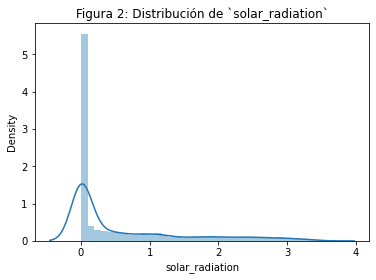

In [202]:
sns.distplot(
    X_train['solar_radiation']).set(title='Figura 2: Distribución de `solar_radiation`')

[Text(0.5, 1.0, 'Figura 3: Distribución de `solar_radiation` transformada')]

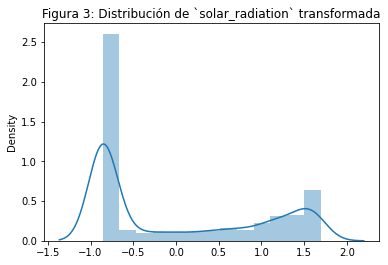

In [201]:
sns.distplot(
    pt.fit_transform(X_train[['solar_radiation']])
    ).set(title='Figura 3: Distribución de `solar_radiation` transformada')

### 5 Selección de características

La selección de características es un proceso que permite identificar variables que sean relevantes para un modelo de aprendizaje. En esta sección se abordan algunos métodos básicos para realizar selección de variables basados en criterios estadístico.

Para mayor detalle se puede consultar la documentación de Sklearn: https://scikit-learn.org/stable/modules/feature_selection.html

### 5.1 Selección por umbral de varianza

Básicamente se trata de un test que busca seleccionar columnas con varianza arriba de cierto nivel o umbral. Intuitivamente la idea es que características que no varien mucho, es decir, que sean casi constantes no serán útiles para predecir con un modelo de aprendizaje.

Este criterio se encuentra disponible a través de la clase `VarianceThreshold`.

### 5.2 Selección por k-mejores variables con test estadísticos

Éste método de selección se basa en realizar algún test estadístico sobre los datos, pudiendo incluir o no a la variable objetivo, para indicar cuales son r las k-características más importantes para el modelo.

Se encuentra disponible mediante la clase `SelectKBest` de Sklearn, pero necesita la especificación de alguno de los siguientes criterios de selección

**Correlación:** Se refiere a tomar las k-variables con el valos más alto del coeficiente de correlación de Pearson. Dicho criterio se encuentra dispnible a través de la clase  `r_regression`

**Estadístico F:** El test de estadístico F es una técnica estadística utilizada para evaluar si un conjunto de variables explicativas son significativamente útiles para predecir la variable de respuesta en un modelo de aprendizaje supervisado. El procedimiento comienza por ajustar un modelo de regresión que incluye todas las variables independientes en el conjunto de datos. Luego, se calcula el estadístico F y su correspondiente valor p. El estadístico F mide la proporción de la variabilidad explicada por el modelo dividida por la variabilidad no explicada. El valor $p$ indica la probabilidad de obtener un estadístico F igual o mayor por casualidad si no hay efecto real de las variables independientes en la variable de respuesta.

En este caso, se puede proceder a seleccionar un subconjunto de variables que proporcionen el mejor ajuste al modelo en términos del valor de $p$. Dicho criterio se encuentra dispnible a través de la clase  `f_classif`.

**Información mutua:** Este método se basa en el concepto estadístico de información mutua, que intutivamente es una medida de la independencia de dos variables aleatorias. Formalmente se define a través de la divergencia Kullback-Leiber. Dicho criterio se encuentra disponible a través de la clase `mutual_info_regression`.

**Ejemplo de selección de variables a través de SelectKBest y r_regression**

Para ello seguiremos el ejemplo de tomar variables del clima, incluir la hora y procesar con one-hot encoding seasons para ajustar un modelo KNN, pero realizando selección de 4-mejores variables por el criterio de correlacion.

In [204]:
from sklearn.feature_selection import SelectKBest, r_regression

# Define listas de columnas que van a emplearse en el modelado
weather_cols = [
    'temperature',
    'humidity',
    'wind_speed',
    'visibility',
    'dew_point_temperature',
    'solar_radiation',
    'rainfall',
    'snowfall',
 ]

seasons_cols = ['seasons']

time_cols = ['hour']

# Lista que tiene todas los grupos de columnas
non_target_cols = weather_cols + seasons_cols + time_cols


# Pipeline para escalar con estandar z-score
numerical_pipe = Pipeline([
    ('standar_scaler', StandardScaler()),
    # ----------- Aqui seleccionamos las 4 mejores variables -------- #
    ('select_k_best',SelectKBest(r_regression, k=4) ),
])

# Pipeline para aplicar one hot encoding
categorical_pipe = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Combina ambos procesos en columnas espeficadas en listas
pre_processor = ColumnTransformer([
    ('numerical', numerical_pipe, weather_cols),
    ('categorical', categorical_pipe, seasons_cols),
], remainder='passthrough')

# comunica al pipeline la lista en el orden que se deben aplicar
# estos pasos

pipe_standard_ohe = Pipeline([
    ('transform', pre_processor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

# Realiza la transformacion de los datos y el ajuste del modelo
pipe_standard_ohe.fit(X_train[non_target_cols], y_train)

y_train_pred = pipe_standard_ohe.predict(X_train[non_target_cols])
y_test_pred = pipe_standard_ohe.predict(X_test[non_target_cols])

# error en conjunto de entrenamiento y prueba
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,2) )
print("Error RSME en test:", round(error_test,2) )


Error RSME en train: 84842.67
Error RSME en test: 254073.42


Cabe mencionar que podemos salvar el modelo anterior usando la utilidad `pickle` de Python:

In [205]:
import pickle
pickle.dump(pipe_standard_ohe, open('pipe_standard_ohe.pkl', 'wb'))

Este mismo se puede volver a leer con `pickle.load`:

In [206]:
pickled_model = pickle.load(open('pipe_standard_ohe.pkl', 'rb'))

### 6. Entregables

A. Modificando el código anterior, crea un script que entrene varios modelos de regresión KNN, sobre los conjuntos de entrenamiento y pruebas descritos en este documento. El modelo deberá contar con las siguientes características:

    * Variables a considerar:
      * Variables numéricas del clima:
      * Variable categóricas (definiendo algun esquema de one-hot encoding):
        * seasons
        * holiday,
        * functioning_day
        * hour (para transforma a categoria puede usar el comando `data['hour].astype('category')`)
        * Las variables categóricas resultado del feature engineering
    * Feature enginering:
      * Crear una variables categóricas para representar: 1) el mes del año, 2) binaria que represente si el día que transcurre es o no un fin de semana,
      * Transformar las variables numéricas del clima usando la transformación *Yeo-Johnson*
    * Feature selection: Realizar la selección de variable usando el criterio de VarianceThreshold
    * El modelo a seleccionar debe ser un KNN de 30 vecinos.
    * Se debe usar los transformadores de SKlearn y el pipeline para entrenar el modelo en el conjunto de entrenamiento y probar su desempeño en el conjunto de prueba.

Este script deberá deberá denominarse `model_fe_engineering_selection.py` y deberá salvar el modelo resultante en formato picke denominado `model_fe_engineering_selection.pk`